In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
import pickle
import networkx as nx
import ipywidgets
from ipywidgets import widgets

from run_simulation import invasion_main

In [2]:
simulation_df = invasion_main(100) # Change this to change the number of weeks
# print(type(simulation_df))
simulation_df

/Volumes/Alexandria/weible_class/Invasive_Species_Propogation/run_simulation.py:231: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cumulative_df.insert(week_tracker + 1, f'Week {week_tracker}', infection_collector, True)
/Volumes/Alexandria/weible_class/Invasive_Species_Propogation/run_simulation.py:231: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cumulative_df.insert(week_tracker + 1, f'Week {week_tracker}', infection_collector, True)


,County,Week 0,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,...,Week 91,Week 92,Week 93,Week 94,Week 95,Week 96,Week 97,Week 98,Week 99,Week 100
0,Cook,0.1,0.131438,0.165995,0.259047,0.364381,0.534722,0.976685,1.000000,1.000000,...,1,1,1,1,1,1,1,1,1,1
1,DuPage,0.0,0.049910,0.123978,0.259965,0.430477,0.722483,1.000000,1.000000,1.000000,...,1,1,1,1,1,1,1,1,1,1
2,Kane,0.3,0.322348,0.368188,0.489818,0.650241,0.982370,1.000000,1.000000,1.000000,...,1,1,1,1,1,1,1,1,1,1
3,Will,0.0,0.047201,0.134137,0.236322,0.405181,0.731733,1.000000,1.000000,1.000000,...,1,1,1,1,1,1,1,1,1,1
4,Winnebago,0.0,0.105014,0.265559,0.536994,0.935639,1.000000,1.000000,1.000000,1.000000,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Henderson,0.0,0.000037,0.000198,0.000573,0.003712,0.014807,0.043592,0.081030,0.145960,...,1,1,1,1,1,1,1,1,1,1
98,Calhoun,0.0,0.008107,0.020407,0.093585,0.210342,0.402274,0.530926,0.928601,1.000000,...,1,1,1,1,1,1,1,1,1,1
99,Schuyler,0.0,0.000016,0.000520,0.002558,0.008507,0.020775,0.058802,0.127708,0.295510,...,1,1,1,1,1,1,1,1,1,1
100,Gallatin,0.0,0.000008,0.000100,0.000392,0.001729,0.005035,0.015102,0.030317,0.071854,...,1,1,1,1,1,1,1,1,1,1


In [3]:
visual_df = simulation_df.T
visual_df.columns = visual_df.iloc[0]
visual_df = visual_df.drop(visual_df.index[0])
visual_df

County,Cook,DuPage,Kane,Will,Winnebago,Lake,McHenry,St. Clair,Kendall,Madison,...,Scott,Stark,Jasper,Hamilton,Pike,Henderson,Calhoun,Schuyler,Gallatin,Pope
Week 0,0.1,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Week 1,0.131438,0.04991,0.322348,0.047201,0.105014,0.021149,0.048665,0.068206,0.067236,0.519872,...,0.002058,0.000674,0.000121,0.000056,0.000842,0.000037,0.008107,0.000016,0.000008,0.0
Week 2,0.165995,0.123978,0.368188,0.134137,0.265559,0.086768,0.11858,0.134037,0.137349,0.578604,...,0.009803,0.005653,0.002386,0.000648,0.007271,0.000198,0.020407,0.00052,0.0001,0.000003
Week 3,0.259047,0.259965,0.489818,0.236322,0.536994,0.183174,0.203162,0.212252,0.264173,0.655098,...,0.028551,0.018796,0.007262,0.002373,0.022839,0.000573,0.093585,0.002558,0.000392,0.000049
Week 4,0.364381,0.430477,0.650241,0.405181,0.935639,0.367021,0.48746,0.336532,0.467391,0.81415,...,0.08958,0.056089,0.026575,0.007354,0.073536,0.003712,0.210342,0.008507,0.001729,0.000202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Week 96,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Week 97,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Week 98,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Week 99,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


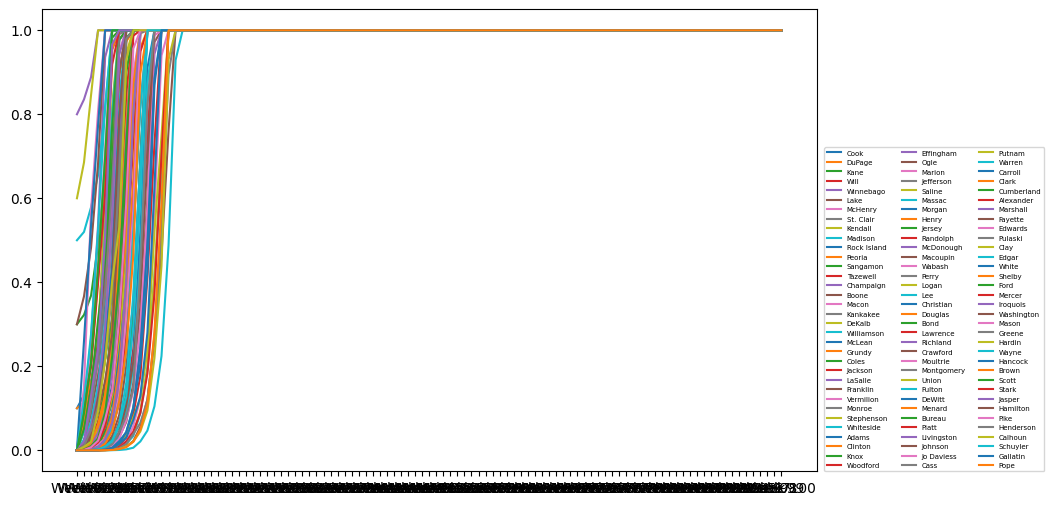

In [4]:
plt.figure(figsize=(10,6))
for county in visual_df.columns:
    plt.plot(visual_df.index, visual_df[county])
plt.legend(visual_df.columns, loc=(1.01, 0), fontsize=5, ncol=3)
plt.show()

In [5]:
path = 'data/location'
edges = pd.read_csv(f'{path}/county_edges.csv')

CG = pickle.load(open(f'{path}/IL_graph.dat', 'rb'))
handler = pickle.load(open(f'{path}/graph_handler_counties.dat', 'rb'))
highways = pickle.load(open(f'{path}/osmnx_highways.dat', 'rb'))

In [6]:
def make_network_heat(week):
    week = f'Week {week}'
#     min_value = simulation_df[week].min()
#     max_value = simulation_df[week].max()  # This makes the scale variable for each chart
    max_value = 1  # This keeps the scale constant 
    min_value = 0
    cmap = matplotlib.colormaps['YlOrRd']

    node_colors = {}
    for node in CG.nodes():
        value = simulation_df.loc[simulation_df['County'] == node.name, week].iloc[0]
        normalized_value = (value - min_value) / (max_value - min_value)
        node_colors[node.name] = cmap(normalized_value)

    labels = {node: handler[node.name].name for node in CG.nodes()}
    fig, ax = plt.subplots(figsize=(10, 15))
    node_positions = {node: [node.centroid.x, node.centroid.y] for node in CG.nodes()}
    nx.draw(CG, 
            pos=node_positions,
            ax=ax, 
            node_color=[node_colors.get(node.name, 'gray') for node in CG.nodes()],
            node_size=1500, )

    nx.draw_networkx_labels(CG, 
                            pos=node_positions, 
                            labels=labels,
                            font_size=6, 
                            ax=ax,
                           font_color='k')

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_value, vmax=max_value))
    sm.set_array([])
    sub_ax = plt.axes([0.96, 0.55, 0.02, 0.3])
    plt.colorbar(sm, cax=sub_ax)
    plt.show()

In [7]:
widgets.interact(make_network_heat,
    week=widgets.IntSlider(min=0, max=len(simulation_df.columns)-2, step=1, layout=widgets.Layout(width='1000px')),
)

interactive(children=(IntSlider(value=0, description='week', layout=Layout(width='1000px')), Output()), _dom_c…

<function __main__.make_network_heat(week)>

In [8]:
# This doesn't work very well for me since the page keeps re-centering

play = widgets.interact(make_network_heat, 
    week=widgets.Play( value=0,
                        min=0,
                        max=len(simulation_df.columns) - 2,
                        step=1,
                        interval=500,
                        disabled=False
                    ))

interactive(children=(Play(value=0, description='week', interval=500), Output()), _dom_classes=('widget-intera…